In [1]:
import md_manager as md

### Reading DataFrames:

In [2]:
df = md.fetch_PDB(pdb_code="4png", atom_only=True)
df.head()

,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q
atom_id,,,,,,,,,,,,,,,
1,ATOM,N,,LYS,A,3,,1.856,13.727,-6.218,1.0,31.43,,N,
2,ATOM,CA,,LYS,A,3,,2.299,13.005,-5.003,1.0,29.48,,C,
3,ATOM,C,,LYS,A,3,,1.674,13.602,-3.712,1.0,28.30,,C,
4,ATOM,O,,LYS,A,3,,0.700,14.378,-3.767,1.0,29.81,,O,
5,ATOM,CB,,LYS,A,3,,3.823,13.002,-4.918,1.0,30.64,,C,


In [3]:
# check for alternate locations:
df.alt.unique()

array(['', 'A', 'B'], dtype=object)

In [4]:
df = df.query("alt in ['', 'A']")

<Axes: xlabel='Residue index', ylabel='Thermal factor [$\\AA^2$]'>

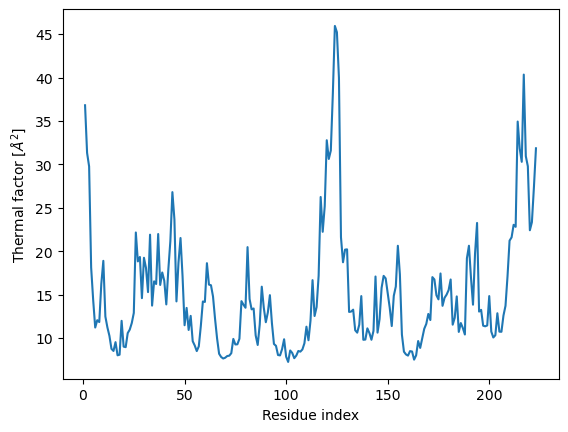

In [5]:
# plot thermal factors:
df.groupby("resi").b.mean().plot(ylabel="Thermal factor [$\\AA^2$]", xlabel = "Residue index")

In [6]:
ca = df.query("name == 'CA'").copy()
ca.head()

,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q
atom_id,,,,,,,,,,,,,,,
2,ATOM,CA,,LYS,A,3,,2.299,13.005,-5.003,1.0,29.48,,C,
7,ATOM,CA,,LEU,A,4,,1.527,13.447,-1.283,1.0,21.24,,C,
15,ATOM,CA,,ILE,A,5,,1.869,16.199,1.293,1.0,14.81,,C,
23,ATOM,CA,,LEU,A,6,,1.675,15.513,5.035,1.0,12.10,,C,
31,ATOM,CA,,TYR,A,7,,0.977,18.532,7.244,1.0,10.99,,C,


In [7]:
for chain_id, chain_df in ca.groupby("chain"):
    theta = md.chain_theta_angles(chain_df)
    ca.loc[theta.index, "Theta"] = theta

    gamma = md.chain_gamma_angles(chain_df)
    ca.loc[gamma.index, "Gamma"] = gamma
ca.head()

,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q,Theta,Gamma
atom_id,,,,,,,,,,,,,,,,,
2,ATOM,CA,,LYS,A,3,,2.299,13.005,-5.003,1.0,29.48,,C,,NaN,NaN
7,ATOM,CA,,LEU,A,4,,1.527,13.447,-1.283,1.0,21.24,,C,,136.694043,-163.690836
15,ATOM,CA,,ILE,A,5,,1.869,16.199,1.293,1.0,14.81,,C,,122.209591,-161.671889
23,ATOM,CA,,LEU,A,6,,1.675,15.513,5.035,1.0,12.10,,C,,115.893723,-159.033144
31,ATOM,CA,,TYR,A,7,,0.977,18.532,7.244,1.0,10.99,,C,,119.849493,64.289395


### CUTABI module

In [8]:
from md_manager import CUTABI

In [9]:
ca["Helix"] = CUTABI.predict_alpha_helix(ca, CA_only=True)
ca.query("Helix").head(15)

,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q,Theta,Gamma,Helix
atom_id,,,,,,,,,,,,,,,,,,
79,ATOM,CA,,PRO,A,13,,1.369,11.254,18.065,1.0,10.20,,C,,96.434655,50.191686,True
86,ATOM,CA,,PRO,A,14,,-1.218,10.985,15.291,1.0,8.95,,C,,89.843303,56.241815,True
93,ATOM,CA,,VAL,A,15,,1.249,12.548,12.853,1.0,8.78,,C,,88.198459,51.759935,True
100,ATOM,CA,,ARG,A,16,,3.690,9.779,13.734,1.0,8.96,,C,,91.074048,60.073259,True
111,ATOM,CA,,ALA,A,17,,1.053,7.136,13.040,1.0,8.21,,C,,86.586608,44.347295,True
116,ATOM,CA,,VAL,A,18,,0.938,8.503,9.506,1.0,8.12,,C,,93.654274,52.933362,True
123,ATOM,CA,,LYS,A,19,,4.764,8.721,9.203,1.0,9.42,,C,,88.287053,50.224046,True
132,ATOM,CA,,LEU,A,20,,4.941,5.056,10.248,1.0,9.00,,C,,91.881697,47.427076,True
140,ATOM,CA,,THR,A,21,,2.363,4.067,7.669,1.0,8.93,,C,,94.205191,49.150449,True


In [10]:
# export the alpha1 helix as new pdb file
alpha1 = df.query("chain == 'A' and (resi >= 13 and resi <= 25)")
alpha1.head()

,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q
atom_id,,,,,,,,,,,,,,,
78,ATOM,N,,PRO,A,13,,1.550,12.701,18.274,1.0,10.45,,N,
79,ATOM,CA,,PRO,A,13,,1.369,11.254,18.065,1.0,10.20,,C,
80,ATOM,C,,PRO,A,13,,0.622,10.860,16.786,1.0,9.61,,C,
81,ATOM,O,,PRO,A,13,,1.105,10.011,16.023,1.0,9.52,,O,
82,ATOM,CB,,PRO,A,13,,0.663,10.782,19.338,1.0,10.68,,C,


In [11]:
md.save("test_alpha1.pdb", alpha1)